In [99]:
%matplotlib notebook
import xemc3
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [159]:
bolotype = "QRB"
experiment = "N03.00_P05.00_D05_R02.00-C"

# gabrieles grid with mapped emc3 data    &     emc3 grid with mapped geometry matrix data

# both geometry matrix together

In [160]:
all_gm_ez = np.load(f"./tempdata/[C] [T] mapped data {bolotype}_{experiment}.npz")
ez_C = all_gm_ez["ez_C"]
ez_T = all_gm_ez["ez_T"]
gm_C = all_gm_ez["gm_C"]
gm_T = all_gm_ez["gm_T"]

#Power_C = (ez_C * gm_C).transpose("Ionization", "foil", "p", "z", "r")
#Power_T = (ez_T * gm_T).transpose("Ionization", "foil", "r", "theta", "phi")
#plot_power_C = Power_C.sum(dim=("Ionization", "p", "z", "r"))
#plot_power_T = Power_T.sum(dim=("Ionization", "r", "theta", "phi"))
#del ez_C, ez_T, gm_C, gm_T

In [161]:
Power_C = (ez_C[:,None,...] * gm_C[None,:,...])
Power_T = (ez_T[:,None,...] * gm_T[None,:,...])
plot_power_C = np.nansum(Power_C, axis=(0,2,3,4))
plot_power_T = np.nansum(Power_T, axis=(0,2,3,4))
del ez_C, ez_T, gm_C, gm_T

# infinitesimal sightline data

In [162]:
#sight_S = np.load(f"sightline_integration_{bolotype}.npz")["data"]
sight_S = np.load(f"./tempdata/sightline_integration_{bolotype}_{experiment}.npz")["sumdata"]

In [163]:
labels = np.load(f"./tempdata/sightline_integration_{bolotype}_{experiment}.npz")["labels"]

# plotting

<IPython.core.display.Javascript object>


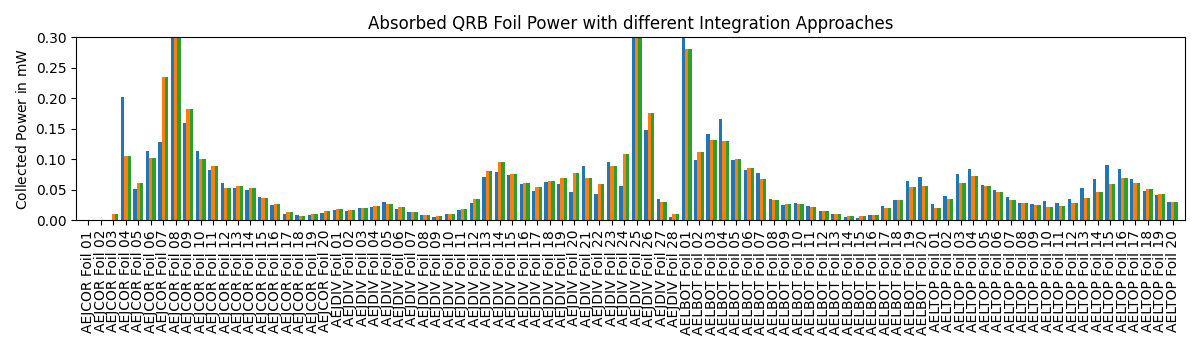

Ellipsis

In [166]:
fig, ax = plt.subplots(figsize=(12,3.5))
tmp_x = np.array(range(len(labels)))
bar_width = 0.27

sr_to_1 = 1 # 4*np.pi
mW_factor = 1000

ax.bar(tmp_x-0.27, mW_factor * sight_S,
       width=bar_width, label=f"infinitesimal sightline")

ax.bar(tmp_x+-0, mW_factor * plot_power_T,
       width=bar_width, label=f"geometry matrix on EMC3/Eirene grid")

ax.bar(tmp_x+0.27, mW_factor * plot_power_C,
       width=bar_width, label=f"geometry matrix on Partesotti-FLT grid") # cartesian based field aligned

ax.set_xticks(tmp_x)
ax.set_xticklabels(labels, rotation=90)
ax.set_xlim(-1, len(labels))
ax.set_title(f"Absorbed {bolotype} Foil Power with different Integration Approaches")
ax.set_ylabel("Collected Power in $\mathrm{mW}$")
#ax.legend(loc=4)
#ax.set_yscale("symlog", linthresh=1e-4)
ax.set_ylim((0,.3))
fig.tight_layout()

#ax.set_yscale("symlog", linthresh=1e-2)
#ax.set_ylim((0, 2e-1))
...

#fig.savefig(f"../images/thesis-{bolotype}_comparison.png")
#fig.savefig(f"../images/thesis-{bolotype}_comparison.pdf")

<IPython.core.display.Javascript object>


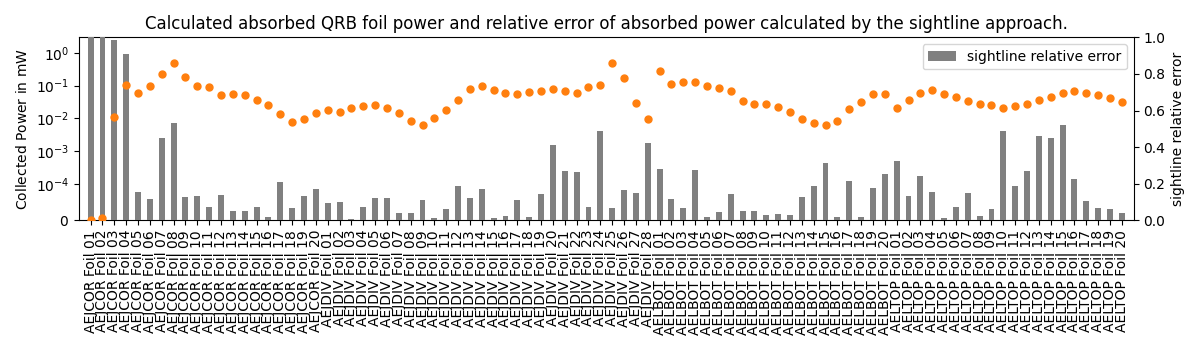

In [164]:
fig, ax = plt.subplots(figsize=(12,3.5))
tmp_x = np.array(range(len(labels)))
ax2 = ax.twinx()
bar_width = 0.5

sr_to_1 = 1 # 4*np.pi
mW_factor = 1000

mean_power = (plot_power_T + plot_power_C)/2
difference_power = (plot_power_T - plot_power_C)/2
difference_power_sightline = sight_S-mean_power



interpol_factor = 1e14
#ax2.bar(tmp_x-0.18, interpol_factor*np.abs(difference_power/mean_power),
#       width=bar_width, label=f"hll")
ax2.bar(tmp_x, np.abs(difference_power_sightline/mean_power),
       width=bar_width, label=f"sightline relative error", zorder=1000, color="gray")
ax.errorbar(tmp_x, mW_factor * mean_power, fmt=".", label="geometry matrix approach",zorder=2000, c="C1",ms=10)

ax.set_xticks(tmp_x)
ax.set_xticklabels(labels, rotation=90)
ax.set_xlim(-1, len(labels))
ax.set_title(f"Calculated absorbed {bolotype} foil power and relative error of absorbed power calculated by the sightline approach.")
ax.set_ylabel("Collected Power in $\mathrm{mW}$")
#ax.legend(loc=1)
ax.set_yscale("symlog", linthresh=1e-4)
ax.set_ylim((0,3))
ax2.legend(loc=1)
ax2.set_ylabel("sightline relative error")
ax2.set_ylim((0,1))
ax.set_zorder(ax2.get_zorder()+1)
ax.set_frame_on(False)
fig.tight_layout()

fig.savefig(f"../images/thesis-{bolotype}_comparison.png")
fig.savefig(f"../images/thesis-{bolotype}_comparison.pdf")

In [172]:
Power_T.shape

(7, 88, 139, 512, 36)

In [173]:
Power_C.shape

(7, 88, 10, 85, 47)

In [68]:
tc_disagree = (plot_power_C - plot_power_T)/(plot_power_C + plot_power_T)/2 * 100

In [74]:
labels[np.argmin(tc_disagree)]
# sorted(tc_disagree)

'HBCm Foil 32'

In [75]:
smap_disagree = (sight_S - (plot_power_C + plot_power_T)/2)/(plot_power_C + plot_power_T)/2 * 100

In [77]:
sorted(smap_disagree)

[-23.343070528125395,
 -22.919504918349368,
 -22.774226832308,
 -22.36817786088481,
 -19.409728855233297,
 -19.224314794408205,
 -18.47974731813969,
 -18.034519947695923,
 -18.001895182725004,
 -17.659534096985777,
 -12.038019236374836,
 -5.5125570378650055,
 -5.146142213491765,
 -3.8230360505206646,
 -3.7741242873662957,
 -3.5540948427678423,
 -2.7340066956800695,
 -2.6832988806237292,
 -2.3953538254204116,
 -1.96594587069147,
 -1.7832719804304793,
 -1.3555152820653444,
 -0.637123663361724,
 -0.5701906046560644,
 -0.33059404445121315,
 -0.3098794284717677,
 -0.268773714054874,
 -0.10973501792952507,
 -0.0962719450657645,
 -0.04060716267064997,
 0.055231783469811106,
 0.18033411798037402,
 0.2015870966844113,
 0.3081716239562185,
 0.4560208842959314,
 1.1340801569844687,
 1.3218237023542,
 1.4144798665687748,
 1.5076700460667716,
 1.5375984179462596,
 1.5739038698793018,
 1.745048593725561,
 1.8809503341618505,
 2.0543085720445196,
 2.644308461490943,
 3.160653960017059,
 3.20305921781

In [ ]:
#gabr_S = np.load("gabriele_grid_sestivity_mapping.npz")["data"]
emc3_Sa = np.load("emc3_grid_sestivity_mapping_all.npz")["data"]
sight_Sa = np.load("sightline_integration_all.npz")["data"]

<IPython.core.display.Javascript object>


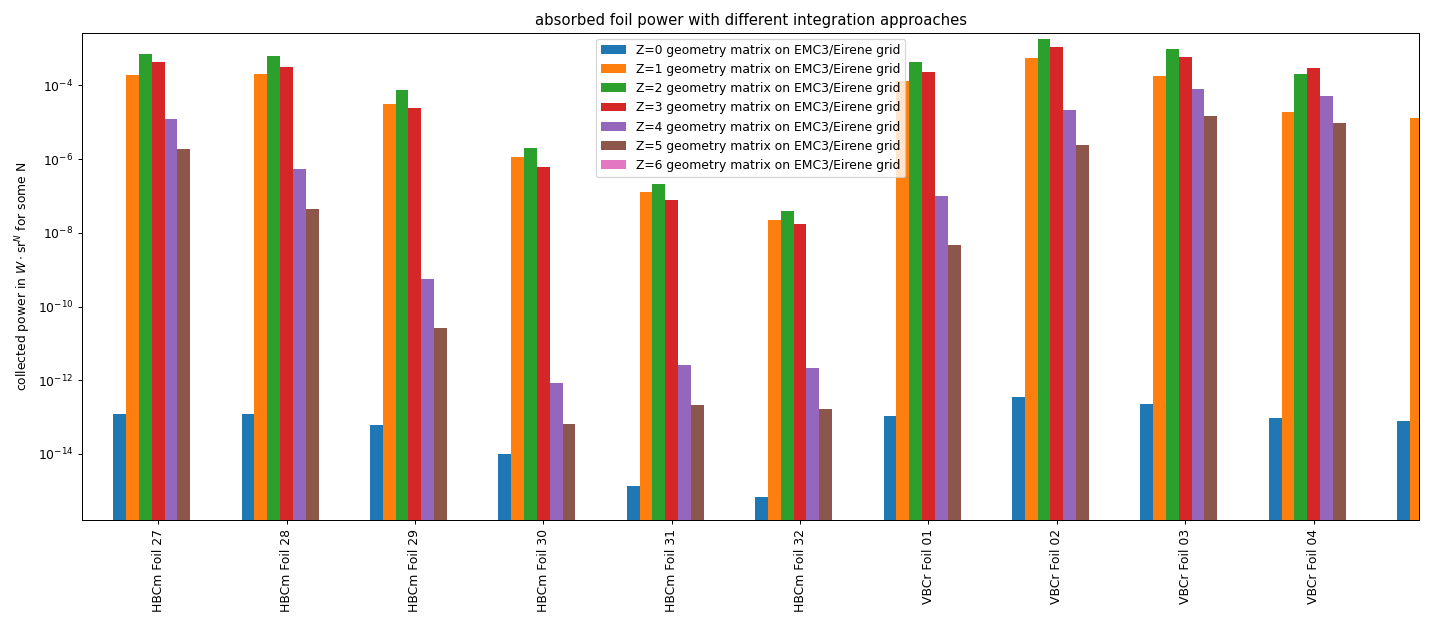

Ellipsis

In [48]:
fig, ax = plt.subplots(figsize=(16,7))
tmp_x = np.array(range(len(labels)))
bar_width = 0.1

# sight_div_gabr = np.pi**2
# emc3_div_gabr = 4

# ax.bar(tmp_x-0.27, sight_S*sight_div_gabr, width=bar_width, label=f"{sight_div_gabr} * infinitesimal sightline")
# ax.bar(tmp_x+-0, emc3_S*emc3_div_gabr, width=bar_width, label=f"{emc3_div_gabr} * geometry matrix on EMC3/Eirene grid")
# ax.bar(tmp_x+0.27, gabr_S, width=bar_width, label=f"geometry matrix on Partesotti-FLT grid") # cartesian based field aligned

for ion in range(7):
    #sight_S = sight_Sa[:, 0]
    emc3_S = emc3_Sa[:, ion]

    #ax.bar(tmp_x-0.2, sight_S, width=bar_width, label=f"infinitesimal sightline")
    ax.bar(tmp_x-0.3+ion*bar_width, emc3_S, width=bar_width, label=f"Z={ion} geometry matrix on EMC3/Eirene grid")

ax.set_xticks(tmp_x)
ax.set_xticklabels(labels, rotation=90)
ax.set_xlim(-1, len(labels))
ax.set_title("absorbed foil power with different integration approaches")
ax.set_ylabel("collected power in $W\cdot\mathrm{sr}^N$ for some N")
ax.set_yscale('log')
ax.legend()
fig.tight_layout()
...